#Questão 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#Intervalo de theta  = [0, 1]
#a > 0

#Função que retorna um vetor com a solução exata nos pontos determinados
def solucao_exata(b, a, t):
  return b*np.exp(-a*t)

def condEstabilidade(a, theta):
  if(theta == 0):
    return -1
  else:
     return 1/(a*theta)

def norma_maximo(aprox, exata):
  return max(abs(exata - aprox))

def taxaconvergencia(erro, numpoints):
  taxa = []
  for i in range(0, len(numpoints)-1):
      taxa.append((np.log2(erro[i+1]) - np.log2(erro[i])) / (np.log2(numpoints[i+1]) - np.log2(numpoints[i])))
  return np.mean(taxa)

def finite_diference(dt, u0, a, theta, npoints):
  u = np.zeros(npoints)
  u[0] = u0
  for n in range(npoints - 1):
    u[n+1] = (u[n]*(1 - a* theta * dt))/(1 + a*dt*(1-theta))
  return u

def pulo_do_sapo(dt, u0, a, npoints):
  u = np.zeros(npoints)
  u[0] = u0
  u[1] =  u[0]*(1 - a * dt) #Euler explícito, talvez seja interessante mudar isso
  for n in range(1, npoints-1):
    u[n+1] = -2*a*u[n]*dt + u[n-1]
  return u

def runge_kutta(dt, u0, a, npoints):
  u = np.zeros(npoints)
  u[0] = u0
  for n in range(npoints -1):
    u[n+1] = u[n] * (1 - a*dt + ((a**2) * (dt**2))/2)
  return u






Valor de Theta: 0.0
Condição de estabilidade: -1
-1.011779793890893

Valor de Theta: 0.1
Condição de estabilidade: 5.0
-1.0034488723250539

Valor de Theta: 0.2
Condição de estabilidade: 2.5
-0.9766781953659545

Valor de Theta: 0.3
Condição de estabilidade: 1.6666666666666665
-0.863158145638542

Valor de Theta: 0.4
Condição de estabilidade: 1.25
-1.030362345133843

Valor de Theta: 0.5
Condição de estabilidade: 1.0
-2.2377164912928205

Valor de Theta: 0.6
Condição de estabilidade: 0.8333333333333334
-1.3044521843640045

Valor de Theta: 0.7
Condição de estabilidade: 0.7142857142857143
-1.2651047432244107

Valor de Theta: 0.8
Condição de estabilidade: 0.625
-1.2611747452635087

Valor de Theta: 0.9
Condição de estabilidade: 0.5555555555555556
-1.2715265593548675

Valor de Theta: 1.0
Condição de estabilidade: 0.5000000000000001
-1.291469777306724

Valor de Theta: -1.0
Condição de estabilidade: -0.5
-1.9209949471993777
Valor de Theta: -2.0
Condição de estabilidade: -0.25
-2.4236595414529107


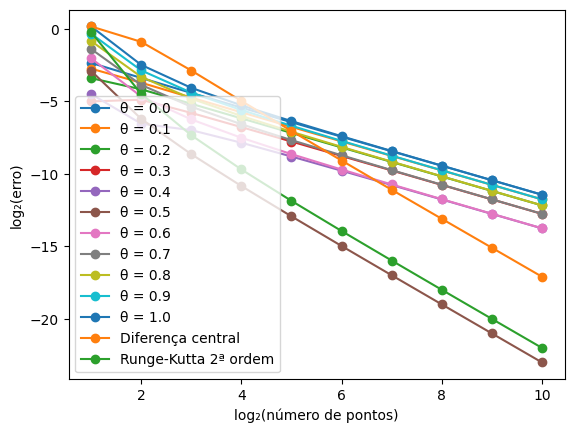

In [2]:
#código para fazer gráficos de taxas de conversão
def main(theta, a, b, T):

  print("Valor de Theta: " + "%.1f" % theta)
  print("Condição de estabilidade: " + str(condEstabilidade(a, theta)))

  erros = np.zeros(10) #a mesma quantidade de refinamentos da linha abaixo :
  npoints = np.zeros(10)
  for j in range(10):
    num_points = 2**(j+1)
    npoints[j] = num_points
    dt = T/(num_points-1) #delta time
    tt = np.linspace(0, T, num_points)
    exata = solucao_exata(b, a, tt)
    if(theta == -1):
        aprox = pulo_do_sapo(dt, b, a, num_points)
    elif(theta == -2):
        aprox = runge_kutta(dt, b, a, num_points)
    else:
      aprox = finite_diference(dt, b, a, theta, num_points)

    erro = norma_maximo(aprox, exata)
    erros[j] = erro

  print(taxaconvergencia(erros, npoints))
  if(theta >= 0):
    legend = 'θ = ' + "%.1f" % theta
  elif(theta == -2):
    legend = "Runge-Kutta 2ª ordem"
  else:
    legend = 'Diferença central'

  plt.plot(np.log2(npoints), np.log2(erros), '-o', label=legend)
  plt.legend()

theta = 0.0
while(theta <= 1):
  main(theta, a=2, b=1, T=1)
  theta += 0.1
  print()

main(-1, a=2, b=1, T=1)
main(-2, a=2, b=1, T=1)


plt.xlabel("log₂(número de pontos)")
plt.ylabel("log₂(erro)")
plt.show()

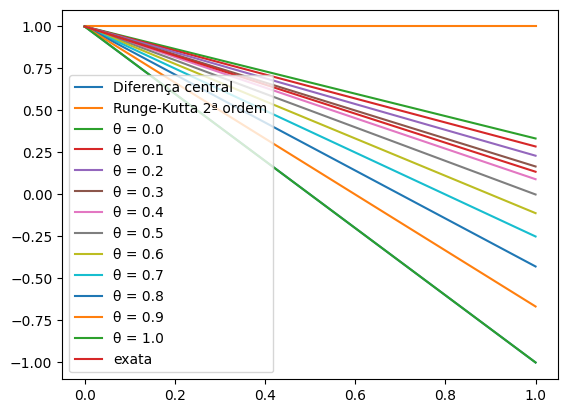

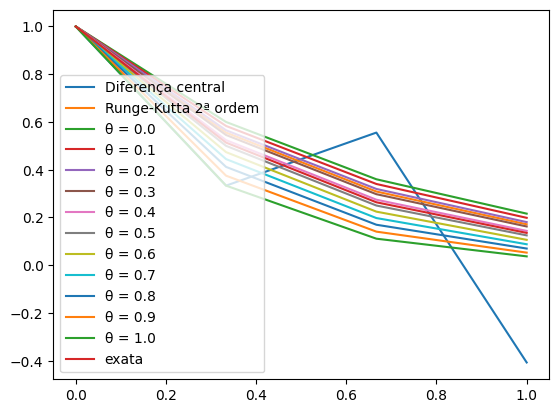

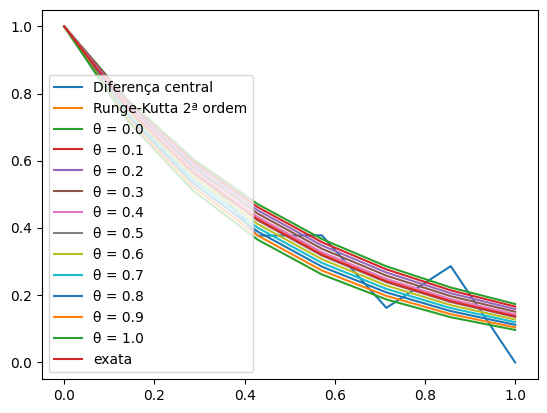

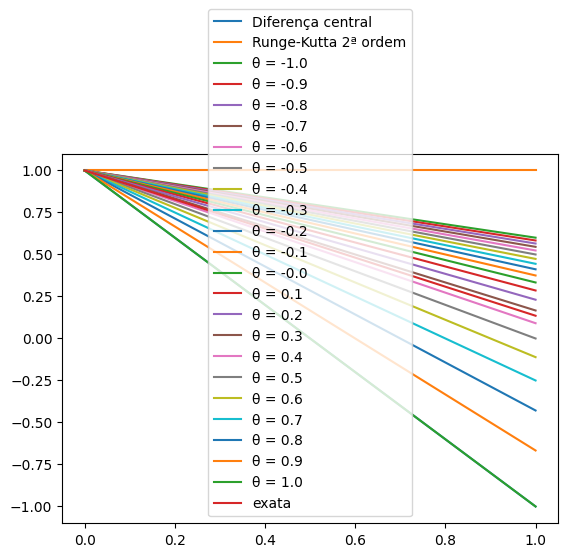

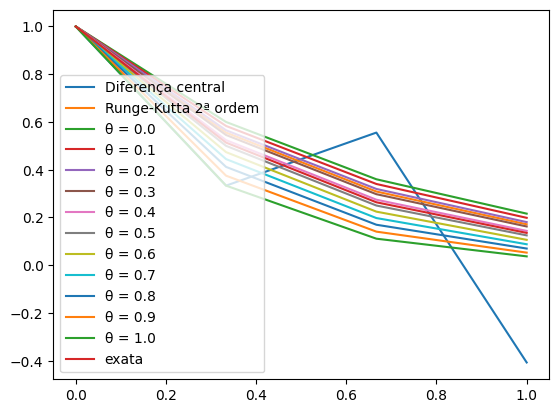

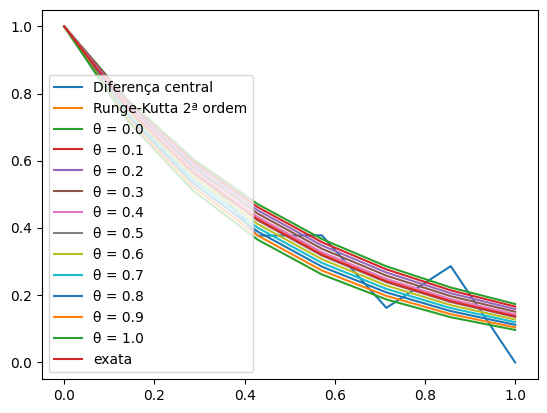

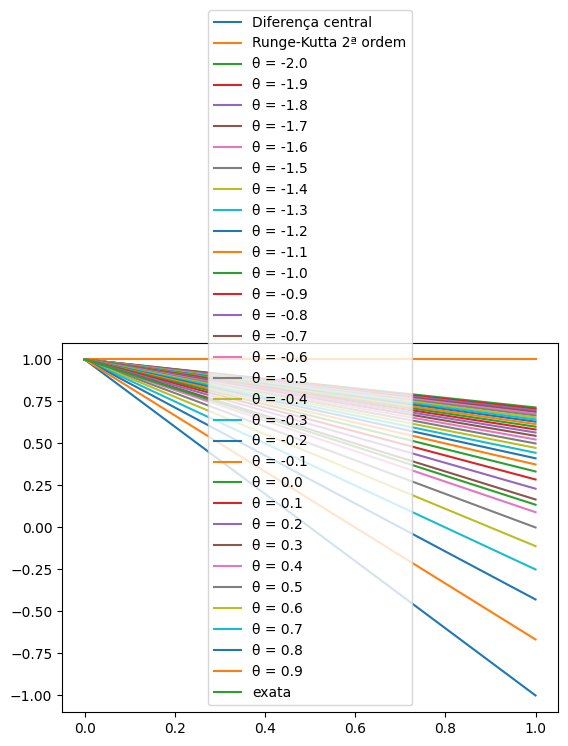

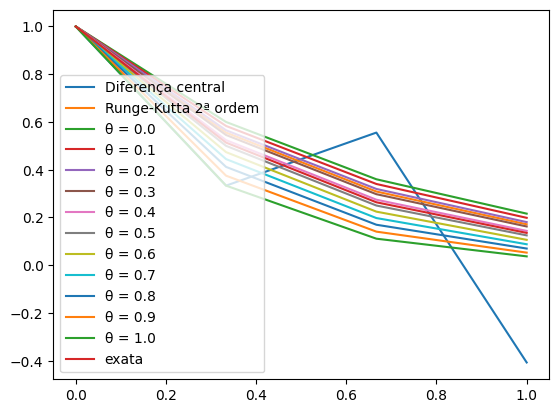

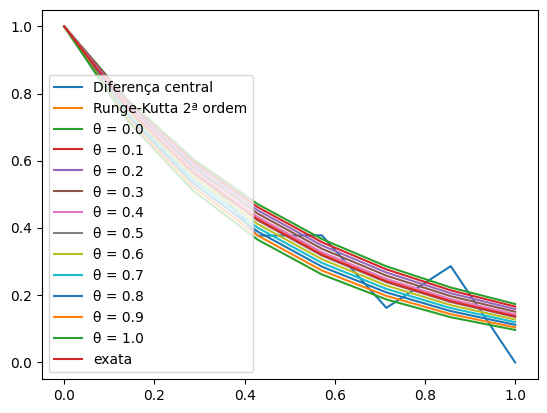

In [4]:
#código para fazer gráficos de taxas de conversão
def main(theta, a, b, T):

  for j in range(3):
    num_points = 2**(j+1)
    dt = T/(num_points-1) #delta time
    tt = np.linspace(0, T, num_points)
    exata = solucao_exata(b, a, tt)

    legend = 'Diferença central'
    aprox = pulo_do_sapo(dt, b, a, num_points)
    plt.plot(tt, aprox, label=legend)
    plt.legend()


    legend = "Runge-Kutta 2ª ordem"
    aprox = runge_kutta(dt, b, a, num_points)
    plt.plot(tt,aprox, label=legend)
    plt.legend()

    while(theta<=1):
      aprox = finite_diference(dt, b, a, theta, num_points)
      legend = 'θ = ' + "%.1f" % theta
      plt.plot(tt,aprox, label=legend)
      plt.legend()
      theta += 0.1
    theta = 0
    plt.plot(tt, exata, label="exata");
    plt.legend()
    plt.show()









#código para fazer gráficos de taxas de conversão
theta = 0.0

main(0, a=2, b=1, T=1)
main(-1, a=2, b=1, T=1)
main(-2, a=2, b=1, T=1)


#Questão 2

Erro: 0.658285850148697
Numero de pontos: 4.0



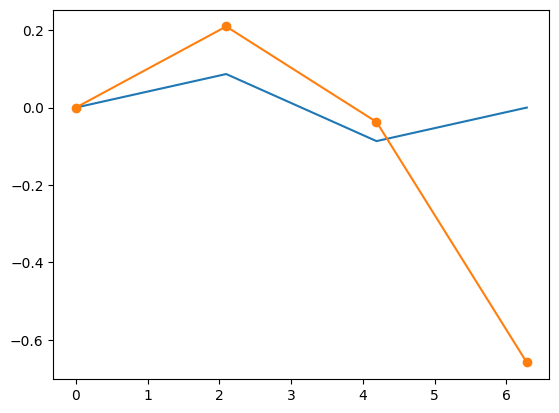

Erro: 0.06763958096001646
Numero de pontos: 16.0



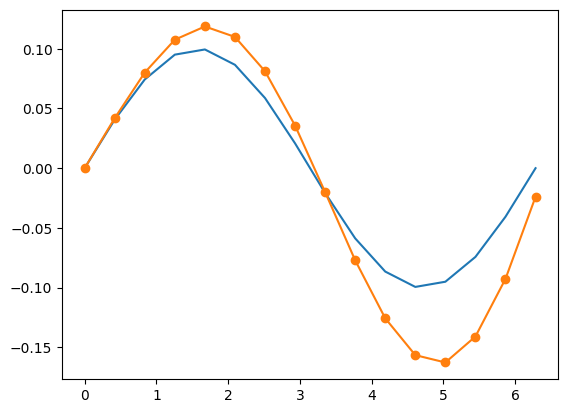

Erro: 0.013057805867482161
Numero de pontos: 64.0



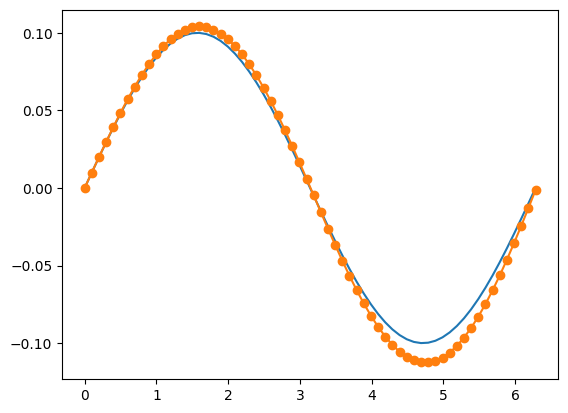

Erro: 0.0031466717889864354
Numero de pontos: 256.0



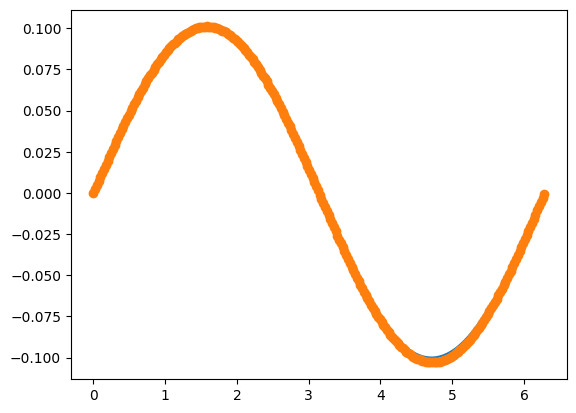

Erro: 0.000907828656754317
Numero de pontos: 1024.0



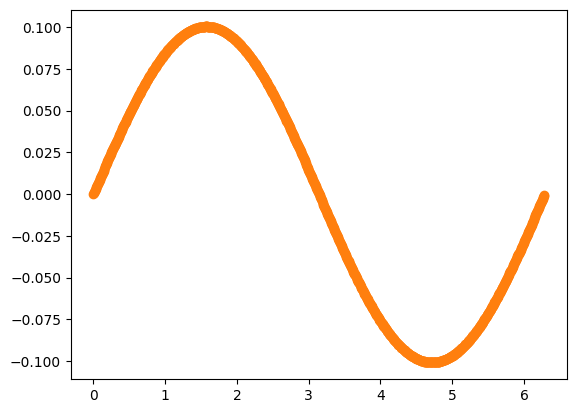

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pprint

def norma_maximo(aprox, exata):
  return max(abs(exata - aprox))

def taxaconvergencia(erro, numpoints):
  taxa = []
  for i in range(0, len(numpoints)-1):
      taxa.append((np.log2(erro[i+1]) - np.log2(erro[i])) / (np.log2(numpoints[i+1]) - np.log2(numpoints[i])))
  return np.mean(taxa)

def solExata(a, b, t):
  exata = (a*np.cos(t)) + (b*np.sin(t))
  return exata

def segunda_ordem(a, b, t, dt, numpoints):
  u = np.zeros(numpoints)
  u[0] = a
  u[1] = dt*b + u[0]
  for n in range(1, numpoints - 1):
    u[n + 1] = -np.sin(u[n])*(dt**2) + 2*u[n] - u[n-1]
  return u

def crank_nicolson(a, b, tt, dt, numpoints):
  u  = np.zeros(numpoints)
  v = b #valor inicial de v = 0.1
  for n in range(numpoints-1):
    u[n+1] = u[n]+dt*v #Euler explícito
    #u[n+1] = u[n] * ((2-v*dt)/(2 + v*dt))
    v = (dt/2)*(-np.sin(u[n+1]) - np.sin(u[n])) + v
  return u

def main2(a, b, T):
  erros = np.zeros(5) #a mesma quantidade de refinamentos da linha abaixo :
  npoints = np.zeros(5)
  for j in range(5):
    num_points = 4**(j+1)
    npoints[j] = num_points
    dt = T/(num_points-1) #delta time
    tt = np.linspace(0, T, num_points)
    exata = solExata(a, b, tt)
    #aprox = segunda_ordem(a, b, tt, dt, num_points)
    aprox = crank_nicolson(a, b, tt, dt, num_points)

    erros[j] = norma_maximo(aprox, exata)
    print("Erro: " + str(erros[j]))
    print("Numero de pontos: " + str(npoints[j]))
    print()
    plt.plot(tt, exata)
    plt.plot(tt, aprox, '-o')
    plt.show()

#Variáveis:
a = 0
b = 0.1
T = 2*np.pi
main2(a, b, T)

Erro: 0.658285850148697
Numero de pontos: 4.0

Erro: 0.19498110535328267
Numero de pontos: 8.0

Erro: 0.06763958096001646
Numero de pontos: 16.0

Erro: 0.028506975308279267
Numero de pontos: 32.0

Erro: 0.013057805867482161
Numero de pontos: 64.0

-1.4139324460750957
-3.011888781620267


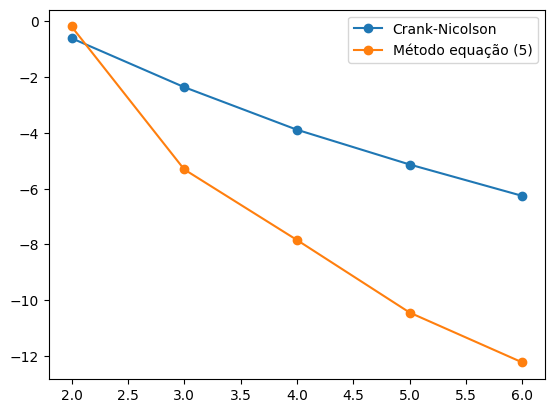

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pprint

def norma_maximo(aprox, exata):
  return max(abs(exata - aprox))

def taxaconvergencia(erro, numpoints):
  taxa = []
  for i in range(0, len(numpoints)-1):
      taxa.append((np.log2(erro[i+1]) - np.log2(erro[i])) / (np.log2(numpoints[i+1]) - np.log2(numpoints[i])))
  return np.mean(taxa)

def solExata(a, b, t):
  exata = (a*np.cos(t)) + (b*np.sin(t))
  return exata

def segunda_ordem(a, b, t, dt, numpoints):
  u = np.zeros(numpoints)
  u[0] = a
  u[1] = dt*b + u[0]
  for n in range(1, numpoints - 1):
    u[n + 1] = -np.sin(u[n])*(dt**2) + 2*u[n] - u[n-1]
  return u

def crank_nicolson(a, b, tt, dt, numpoints):
  u  = np.zeros(numpoints)
  v = b #valor inicial de v = 0.1
  for n in range(numpoints-1):
    u[n+1] = u[n]+dt*v #Euler explícito
    #u[n+1] = u[n] * ((2-v*dt)/(2 + v*dt))
    v = (dt/2)*(-np.sin(u[n+1]) - np.sin(u[n])) + v
  return u

def main2(a, b, T):
  erros = np.zeros(5) #a mesma quantidade de refinamentos da linha abaixo :
  npoints = np.zeros(5)
  for j in range(1,6):
    num_points = 2**(j+1)
    npoints[j-1] = num_points
    dt = T/(num_points-1) #delta time
    tt = np.linspace(0, T, num_points)
    exata = solExata(a, b, tt)
    #aprox = segunda_ordem(a, b, tt, dt, num_points)
    aprox = crank_nicolson(a, b, tt, dt, num_points)

    erros[j-1] = norma_maximo(aprox, exata)
    print("Erro: " + str(erros[j-1]))
    print("Numero de pontos: " + str(npoints[j-1]))
    print()

  print(taxaconvergencia(erros,npoints))
  plt.plot(np.log2(npoints), np.log2(erros), '-o', label="Crank-Nicolson")
  plt.legend()

  for j in range(1,6):
    num_points = 2**(j+1)
    npoints[j-1] = num_points
    dt = T/(num_points-1) #delta time
    tt = np.linspace(0, T, num_points)
    exata = solExata(a, b, tt)
    aprox = segunda_ordem(a, b, tt, dt, num_points)
    #aprox = crank_nicolson(a, b, tt, dt, num_points)

    erros[j-1] = norma_maximo(aprox, exata)
    '''  print("Erro: " + str(erros[j-1]))
    print("Numero de pontos: " + str(npoints[j-1]))
    print() '''
  print(taxaconvergencia(erros,npoints))
  plt.plot(np.log2(npoints), np.log2(erros), '-o', label="Método equação (5)")
  plt.legend()
#Variáveis:
a = 0
b = 0.1
T = 2*np.pi
main2(a, b, T)